# Sourcing and Analyzing Time Series Data - Task 6.6

## This script contains the following: 

### 1. Installing libraries and API key

### 2. Importing Quandl data

### 3. Creating Quandl subset and explanation of why this data will not be used 

### 4. Importing Kaggle GDP data and terrorism data

### 5. Creating subsets of Kaggle data

### 6. Creating a line chart of Kaggle data

### 7. Decomposing Kaggle data’s components

### 8. Conducting a Dickey-Fuller test on Kaggle data

### 9. Conducting differencing on Kaggle data

### 10. Checking Kaggle's data autocorrelations

## 1. Question 1 - Install the Quandl library and register for a Quandl account as described in the Exercise. 

### Importing Libraries

In [307]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
from datetime import datetime
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

### Importing API Key

In [3]:
quandl.ApiConfig.api_key = 'QyaSx2sh6KVx5LCGfDx4'

## 2. Question 2 - Find a data set to work and import it into your Jupyter notebook. Ensure that this data somehow connects to the broader research topic for your Achievement project. The best data set would be one that shares a common key with your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, so it’s not a requirement.

### Importing World Bank Data

In [4]:
## Importing World Bank Data 
data = quandl.get_table('WB/DATA')

In [5]:
## Consistency checks 
data.head(5)

,series_id,country_code,country_name,year,value
None,,,,,
0,VC.PKP.TOTL.UN,XKX,Kosovo,2017,357.0
1,VC.PKP.TOTL.UN,XKX,Kosovo,2016,462.0
2,VC.PKP.TOTL.UN,XKX,Kosovo,2015,640.0
3,VC.PKP.TOTL.UN,XKX,Kosovo,2014,736.0
4,VC.PKP.TOTL.UN,XKX,Kosovo,2013,756.0


In [6]:
## Checking shape 
data.shape

(10000, 5)

In [15]:
## Checking unique series_id's
data['series_id'].value_counts()

VC.IHR.PSRC.P5       4423
VC.IHR.PSRC.FE.P5    2675
VC.IHR.PSRC.MA.P5    2672
VC.PKP.TOTL.UN        149
VC.IDP.TOCV            81
Name: series_id, dtype: int64

In [16]:
## Importing World Bank Dictionary 
data_2 = quandl.get_table('WB/METADATA')

In [17]:
## Consistency checks 
data_2.head(5)

,series_id,name,description
None,,,
0,VC.PKP.TOTL.UN,"Presence of peace keepers (number of troops, p...",Presence of peacebuilders and peacekeepers are...
1,VC.IHR.PSRC.P5,"Intentional homicides (per 100,000 people)",Intentional homicides are estimates of unlawfu...
2,VC.IHR.PSRC.MA.P5,"Intentional homicides, male (per 100,000 male)","Intentional homicides, male are estimates of u..."
3,VC.IHR.PSRC.FE.P5,"Intentional homicides, female (per 100,000 fem...","Intentional homicides, female are estimates of..."
4,VC.IDP.TOCV,"Internally displaced persons, total displaced ...",Internally displaced persons are defined accor...


## 3. Question 3 - Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.

In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.

Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.

In [18]:
## Creating a subset of data to only look at total peacekeepers in Afghanistan 

data = data[(data['series_id'] == 'VC.PKP.TOTL.UN') & (data['country_name'] == 'Afghanistan')]

In [19]:
data

,series_id,country_code,country_name,year,value
None,,,,,
141,VC.PKP.TOTL.UN,AFG,Afghanistan,2016,462.0
142,VC.PKP.TOTL.UN,AFG,Afghanistan,2015,600.0
143,VC.PKP.TOTL.UN,AFG,Afghanistan,2014,690.0
144,VC.PKP.TOTL.UN,AFG,Afghanistan,2013,1350.0
145,VC.PKP.TOTL.UN,AFG,Afghanistan,2012,1334.0
146,VC.PKP.TOTL.UN,AFG,Afghanistan,2011,960.0
147,VC.PKP.TOTL.UN,AFG,Afghanistan,2010,1088.0
148,VC.PKP.TOTL.UN,AFG,Afghanistan,2009,1420.0


## There are very few data sets on Quandl that include worldwide free data. I found data from the world bank that did include worldwide data, but for each country there are only a few entries. There are not enough entries to perform a time series analysis. Thus, I found a data set on Kaggle that included more data points for countries around the world. 

## 4. Question 2 - Find a data set to work and import it into your Jupyter notebook. Ensure that this data somehow connects to the broader research topic for your Achievement project. The best data set would be one that shares a common key with your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, so it’s not a requirement.¶

In [219]:
## Importing Kaggle GDP data
gdp = pd.read_csv(r"C:\Users\bgros\Documents\Career Foundry\10-2023 Global Terrorism Analysis\02. Data\Raw Data\GDP Raw Data.csv", encoding = "ISO-8859-1", low_memory=True)

In [220]:
## Consistency Checks 
gdp.head(5)

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [221]:
## Consistency Checks 
gdp.shape

(11507, 4)

In [222]:
## Importing Terrorism Data
terror = pd.read_csv(r"C:\Users\bgros\Documents\Career Foundry\10-2023 Global Terrorism Analysis\02. Data\Clean Data\Clean_Terror_Data.csv", encoding = "ISO-8859-1", low_memory=True)

In [223]:
## Consistency Checks 
terror.head(5)

,iyear,imonth,iday,extended,country_txt,region_txt,latitude,longitude,crit1,crit2,...,propextent_txt,ishostkid,nhostkid,nhostkidus,hostkidoutcome_txt,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,2000,1,1,0,Namibia,Sub-Saharan Africa,-17.910812,19.988303,1,1,...,Missing,0.0,NaN,NaN,Missing,NaN,1,1,0,1
1,2000,1,1,1,Namibia,Sub-Saharan Africa,-17.910812,19.988303,1,1,...,Missing,1.0,20.0,0.0,Unknown,-99.0,1,1,0,1
2,2000,1,1,0,India,South Asia,32.925224,75.135264,1,1,...,Missing,0.0,NaN,NaN,Missing,NaN,1,1,0,1
3,2000,1,1,0,Kosovo,Eastern Europe,42.659809,20.307119,1,1,...,Missing,0.0,NaN,NaN,Missing,NaN,-9,-9,1,1
4,2000,1,1,0,Somalia,Sub-Saharan Africa,2.059819,45.326115,1,0,...,Missing,0.0,NaN,NaN,Missing,NaN,-9,-9,0,-9


In [224]:
## Finding top 3 countries with terrorism 
terror['country_txt'].value_counts()

Iraq              22494
Afghanistan       12226
Pakistan          12163
India              8667
Philippines        4863
                  ...  
St. Lucia             1
Togo                  1
Western Sahara        1
Cuba                  1
Costa Rica            1
Name: country_txt, Length: 166, dtype: int64

## 5. Question 3 - Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.

In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.

Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.

### Iraq Subset

In [225]:
## Creating a subset with Iraq data from 1990 - 2016
Iraq = gdp[(gdp['Country Name']== 'Iraq') & (gdp['Year'] > 1999)]

In [226]:
## Consistency Checks 
Iraq.head(20)

,Country Name,Country Code,Year,Value
6264,Iraq,IRQ,2004,3.662790e+10
6265,Iraq,IRQ,2005,4.995489e+10
6266,Iraq,IRQ,2006,6.514029e+10
6267,Iraq,IRQ,2007,8.884005e+10
6268,Iraq,IRQ,2008,1.316137e+11
6269,Iraq,IRQ,2009,1.116609e+11
6270,Iraq,IRQ,2010,1.385167e+11
6271,Iraq,IRQ,2011,1.857497e+11
6272,Iraq,IRQ,2012,2.180010e+11
6273,Iraq,IRQ,2013,2.346484e+11


### I created a subset of Iraq data from 2000-2016 because Iraq had the highest number of terrorist attacks from 2000-2017. I am curious if GDP has any correlation with the number of attacks. 

In [227]:
## Reset index 
Iraq = Iraq.reset_index()

In [228]:
## Consistency Checks 
Iraq.head(5)

,index,Country Name,Country Code,Year,Value
0,6264,Iraq,IRQ,2004,3.662790e+10
1,6265,Iraq,IRQ,2005,4.995489e+10
2,6266,Iraq,IRQ,2006,6.514029e+10
3,6267,Iraq,IRQ,2007,8.884005e+10
4,6268,Iraq,IRQ,2008,1.316137e+11


In [229]:
## Insert Day and Month Column 
Iraq = Iraq.assign(day=['1/', '1/', '1/','1/', '1/', '1/','1/', '1/', '1/','1/', '1/', '1/', '1/'])
Iraq = Iraq.assign(month=['1/', '1/', '1/','1/', '1/', '1/','1/', '1/', '1/','1/', '1/', '1/', '1/'])

In [230]:
## Consistency Checks 
Iraq.head(5)

,index,Country Name,Country Code,Year,Value,day,month
0,6264,Iraq,IRQ,2004,3.662790e+10,1/,1/
1,6265,Iraq,IRQ,2005,4.995489e+10,1/,1/
2,6266,Iraq,IRQ,2006,6.514029e+10,1/,1/
3,6267,Iraq,IRQ,2007,8.884005e+10,1/,1/
4,6268,Iraq,IRQ,2008,1.316137e+11,1/,1/


In [232]:
## Combine columns to make date column 
Iraq['month'] = Iraq['month'].astype(str)
Iraq['day'] = Iraq['day'].astype(str)
Iraq['Year'] = Iraq['Year'].astype(str)

Iraq['Date'] = Iraq[['month','day','Year']].agg(''.join, axis =1)

In [233]:
## Consistency Checks 
Iraq.head(5)

,index,Country Name,Country Code,Year,Value,day,month,Date
0,6264,Iraq,IRQ,2004,3.662790e+10,1/,1/,1/1/2004
1,6265,Iraq,IRQ,2005,4.995489e+10,1/,1/,1/1/2005
2,6266,Iraq,IRQ,2006,6.514029e+10,1/,1/,1/1/2006
3,6267,Iraq,IRQ,2007,8.884005e+10,1/,1/,1/1/2007
4,6268,Iraq,IRQ,2008,1.316137e+11,1/,1/,1/1/2008


In [234]:
## Set index as year 
Iraq['datetime'] = pd.to_datetime(Iraq['Date'])
Iraq = Iraq.set_index('datetime')
Iraq.drop(['Date'], axis=1, inplace=True)
Iraq.head(5)

,index,Country Name,Country Code,Year,Value,day,month
datetime,,,,,,,
2004-01-01,6264,Iraq,IRQ,2004,3.662790e+10,1/,1/
2005-01-01,6265,Iraq,IRQ,2005,4.995489e+10,1/,1/
2006-01-01,6266,Iraq,IRQ,2006,6.514029e+10,1/,1/
2007-01-01,6267,Iraq,IRQ,2007,8.884005e+10,1/,1/
2008-01-01,6268,Iraq,IRQ,2008,1.316137e+11,1/,1/


In [235]:
## Dropping index, country name, country code, year, day and month 
Iraq = Iraq.drop(columns = ['index', 'Country Name', 'Country Code', 'Year', 'day', 'month'])

In [236]:
## Consistency Checks 
Iraq.head(5)

,Value
datetime,
2004-01-01,3.662790e+10
2005-01-01,4.995489e+10
2006-01-01,6.514029e+10
2007-01-01,8.884005e+10
2008-01-01,1.316137e+11


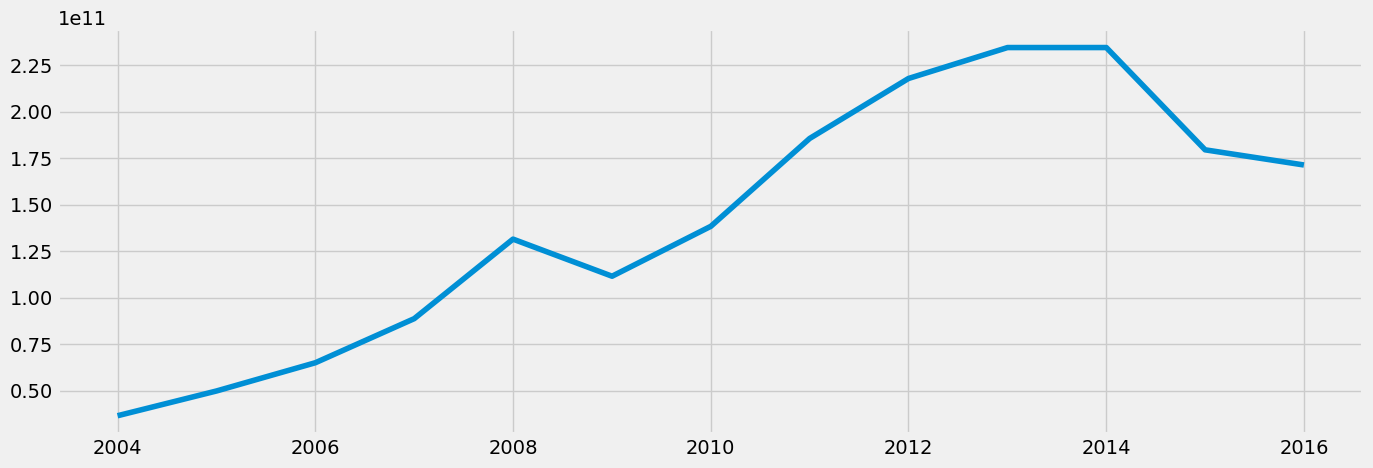

In [237]:
## Plotting Iraq data 
plt.figure(figsize=(15,5), dpi=100)
plt.plot(Iraq)

### Afghanistan Subset

In [238]:
## Creating a subset with Afghanistan data from 1990 - 2016
Afghanistan = gdp[(gdp['Country Name']== 'Afghanistan') & (gdp['Year'] > 1999)]

In [239]:
## Consistency Checks 
Afghanistan.head(20)

,Country Name,Country Code,Year,Value
2328,Afghanistan,AFG,2001,2.461666e+09
2329,Afghanistan,AFG,2002,4.128821e+09
2330,Afghanistan,AFG,2003,4.583644e+09
2331,Afghanistan,AFG,2004,5.285466e+09
2332,Afghanistan,AFG,2005,6.275074e+09
2333,Afghanistan,AFG,2006,7.057598e+09
2334,Afghanistan,AFG,2007,9.843842e+09
2335,Afghanistan,AFG,2008,1.019053e+10
2336,Afghanistan,AFG,2009,1.248694e+10
2337,Afghanistan,AFG,2010,1.593680e+10


### I created a subset of Afghanistan data from 2000-2016 because Afghanistan had the second highest number of terrorist attacks from 2000-2017. I am curious if GDP has any correlation with the number of attacks. 

In [240]:
## Reset index 
Afghanistan = Afghanistan.reset_index()

In [241]:
## Consistency Checks 
Afghanistan.head(5)

,index,Country Name,Country Code,Year,Value
0,2328,Afghanistan,AFG,2001,2.461666e+09
1,2329,Afghanistan,AFG,2002,4.128821e+09
2,2330,Afghanistan,AFG,2003,4.583644e+09
3,2331,Afghanistan,AFG,2004,5.285466e+09
4,2332,Afghanistan,AFG,2005,6.275074e+09


In [242]:
## Insert Day and Month Column 
Afghanistan = Afghanistan.assign(day=['1/', '1/', '1/','1/', '1/', '1/','1/', '1/', '1/','1/', '1/', '1/', '1/', '1/', '1/', '1/'])
Afghanistan = Afghanistan.assign(month=['1/', '1/', '1/','1/', '1/', '1/','1/', '1/', '1/','1/', '1/', '1/', '1/', '1/', '1/', '1/'])

In [243]:
## Consistency Checks 
Afghanistan.head(5)

,index,Country Name,Country Code,Year,Value,day,month
0,2328,Afghanistan,AFG,2001,2.461666e+09,1/,1/
1,2329,Afghanistan,AFG,2002,4.128821e+09,1/,1/
2,2330,Afghanistan,AFG,2003,4.583644e+09,1/,1/
3,2331,Afghanistan,AFG,2004,5.285466e+09,1/,1/
4,2332,Afghanistan,AFG,2005,6.275074e+09,1/,1/


In [244]:
## Combine columns to make date column 
Afghanistan['month'] = Afghanistan['month'].astype(str)
Afghanistan['day'] = Afghanistan['day'].astype(str)
Afghanistan['Year'] = Afghanistan['Year'].astype(str)

Afghanistan['Date'] = Afghanistan[['month','day','Year']].agg(''.join, axis =1)

In [245]:
## Consistency Checks 
Afghanistan.head(5)

,index,Country Name,Country Code,Year,Value,day,month,Date
0,2328,Afghanistan,AFG,2001,2.461666e+09,1/,1/,1/1/2001
1,2329,Afghanistan,AFG,2002,4.128821e+09,1/,1/,1/1/2002
2,2330,Afghanistan,AFG,2003,4.583644e+09,1/,1/,1/1/2003
3,2331,Afghanistan,AFG,2004,5.285466e+09,1/,1/,1/1/2004
4,2332,Afghanistan,AFG,2005,6.275074e+09,1/,1/,1/1/2005


In [246]:
## Set index as year 
Afghanistan['datetime'] = pd.to_datetime(Afghanistan['Date'])
Afghanistan = Afghanistan.set_index('datetime')
Afghanistan.drop(['Date'], axis=1, inplace=True)
Afghanistan.head(5)

,index,Country Name,Country Code,Year,Value,day,month
datetime,,,,,,,
2001-01-01,2328,Afghanistan,AFG,2001,2.461666e+09,1/,1/
2002-01-01,2329,Afghanistan,AFG,2002,4.128821e+09,1/,1/
2003-01-01,2330,Afghanistan,AFG,2003,4.583644e+09,1/,1/
2004-01-01,2331,Afghanistan,AFG,2004,5.285466e+09,1/,1/
2005-01-01,2332,Afghanistan,AFG,2005,6.275074e+09,1/,1/


In [247]:
## Dropping index, country name, country code, year, day and month 
Afghanistan = Afghanistan.drop(columns = ['index', 'Country Name', 'Country Code', 'Year', 'day', 'month'])

In [248]:
## Consistency Checks 
Afghanistan.head(5)

,Value
datetime,
2001-01-01,2.461666e+09
2002-01-01,4.128821e+09
2003-01-01,4.583644e+09
2004-01-01,5.285466e+09
2005-01-01,6.275074e+09


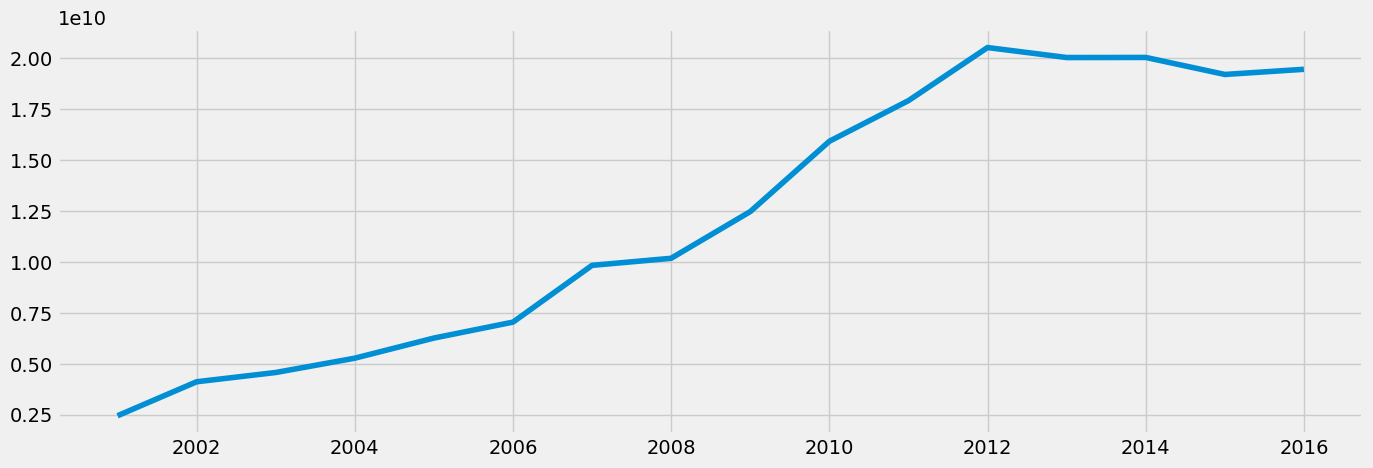

In [249]:
## Plotting Afghanistan data 
plt.figure(figsize=(15,5), dpi=100)
plt.plot(Afghanistan)

### Pakistan Subset

In [53]:
## Creating a subset with Pakistan data from 1990 - 2016
Pakistan = gdp[(gdp['Country Name']== 'Pakistan') & (gdp['Year'] > 1999)]

In [54]:
## Consistency Checks 
Pakistan.head(20)

,Country Name,Country Code,Year,Value
8641,Pakistan,PAK,2000,7.395237e+10
8642,Pakistan,PAK,2001,7.230974e+10
8643,Pakistan,PAK,2002,7.230682e+10
8644,Pakistan,PAK,2003,8.324480e+10
8645,Pakistan,PAK,2004,9.797777e+10
8646,Pakistan,PAK,2005,1.095021e+11
8647,Pakistan,PAK,2006,1.372641e+11
8648,Pakistan,PAK,2007,1.523857e+11
8649,Pakistan,PAK,2008,1.700778e+11
8650,Pakistan,PAK,2009,1.681528e+11


### I created a subset of Pakistan data from 2000-2016 because Pakistan had the third highest number of terrorist attacks from 2000-2017. I am curious if GDP has any correlation with the number of attacks. 

In [250]:
## Reset index 
Pakistan = Pakistan.reset_index()

In [251]:
## Insert Day and Month Column 
Pakistan = Pakistan.assign(day=['1/', '1/', '1/','1/', '1/', '1/','1/', '1/', '1/','1/', '1/', '1/', '1/', '1/', '1/', '1/', '1/'])
Pakistan = Pakistan.assign(month=['1/', '1/', '1/','1/', '1/', '1/','1/', '1/', '1/','1/', '1/', '1/', '1/', '1/', '1/', '1/', '1/'])

In [252]:
## Combine columns to make date column 
Pakistan['month'] = Pakistan['month'].astype(str)
Pakistan['day'] = Pakistan['day'].astype(str)
Pakistan['Year'] = Pakistan['Year'].astype(str)

Pakistan['Date'] = Pakistan[['month','day','Year']].agg(''.join, axis =1)

In [253]:
## Set index as year 
Pakistan['datetime'] = pd.to_datetime(Pakistan['Date'])
Pakistan = Pakistan.set_index('datetime')
Pakistan.drop(['Date'], axis=1, inplace=True)
Pakistan.head(5)

,index,Country Name,Country Code,Year,Value,day,month
datetime,,,,,,,
2000-01-01,8641,Pakistan,PAK,2000,7.395237e+10,1/,1/
2001-01-01,8642,Pakistan,PAK,2001,7.230974e+10,1/,1/
2002-01-01,8643,Pakistan,PAK,2002,7.230682e+10,1/,1/
2003-01-01,8644,Pakistan,PAK,2003,8.324480e+10,1/,1/
2004-01-01,8645,Pakistan,PAK,2004,9.797777e+10,1/,1/


In [255]:
## Dropping index, country name, country code, year, day, and month 
Pakistan = Pakistan.drop(columns = ['index', 'Country Name', 'Country Code', 'Year', 'day', 'month'])

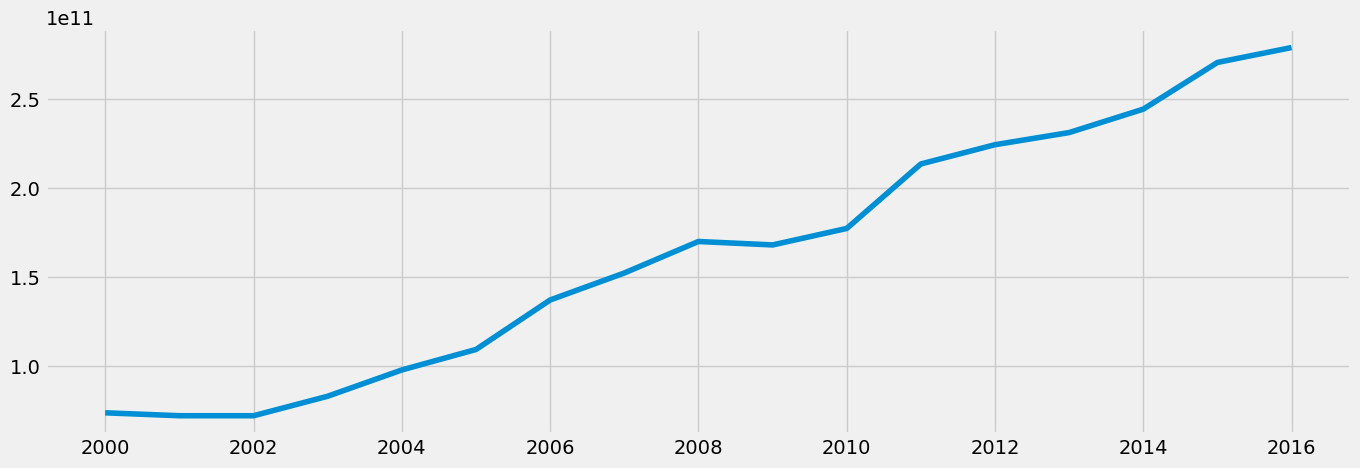

In [256]:
## Plotting Pakistan data 
plt.figure(figsize=(15,5), dpi=100)
plt.plot(Pakistan)

## 6. Question 4 - Create a line chart of your data.

### Iraq

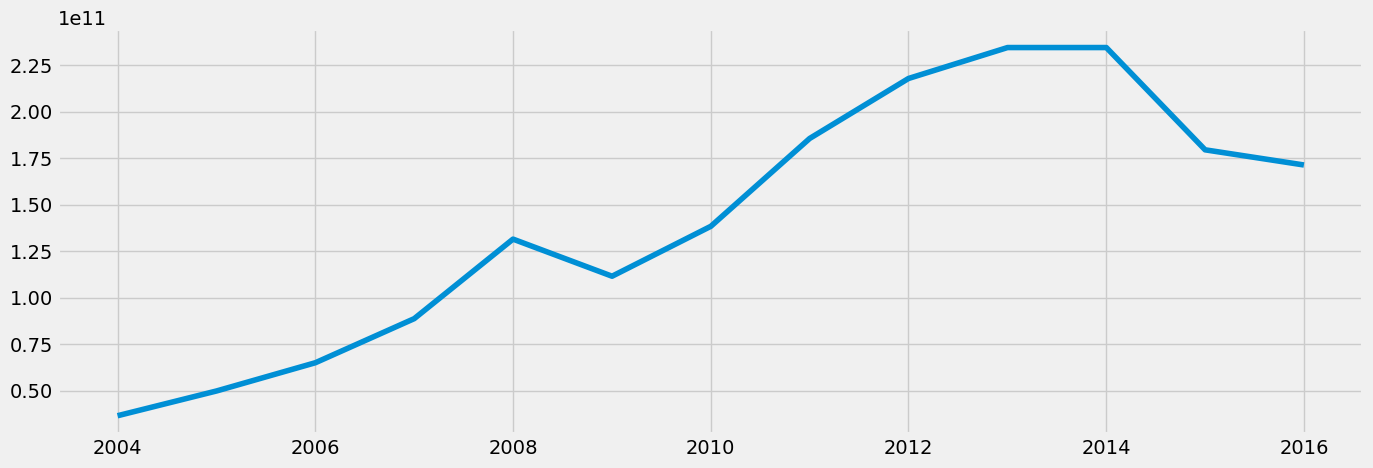

In [257]:
## Plotting Iraq data 
plt.figure(figsize=(15,5), dpi=100)
plt.plot(Iraq)

### Afghanistan

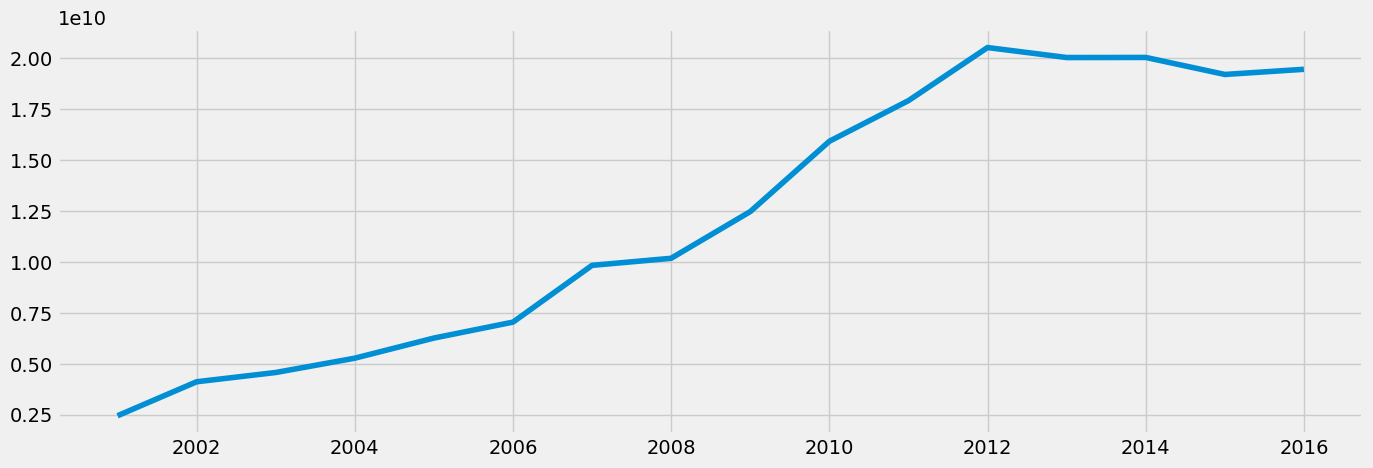

In [258]:
## Plotting Afghanistan data 
plt.figure(figsize=(15,5), dpi=100)
plt.plot(Afghanistan)

### Pakistan

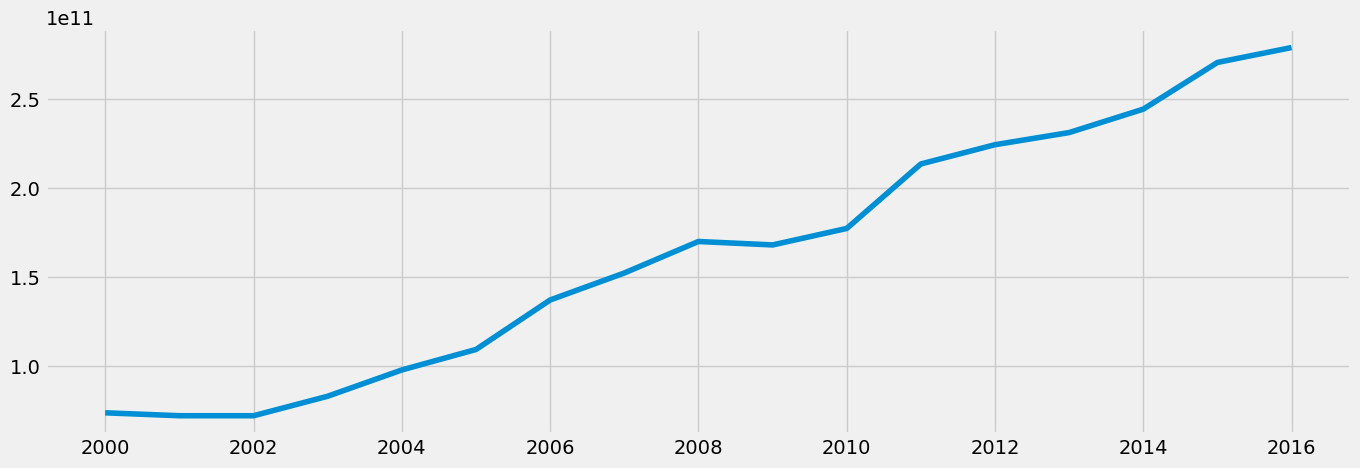

In [259]:
## Plotting Pakistan data 
plt.figure(figsize=(15,5), dpi=100)
plt.plot(Pakistan)

## 7. Question 5 - Decompose the data’s components.
Analyze the results from the plot in a markdown cell.

### Iraq

In [261]:
## Decompose Iraq data 
decompositionI = sm.tsa.seasonal_decompose(Iraq, model='additive')

In [263]:
## Define fized size for all special charts 
rcParams['figure.figsize'] = 18, 7

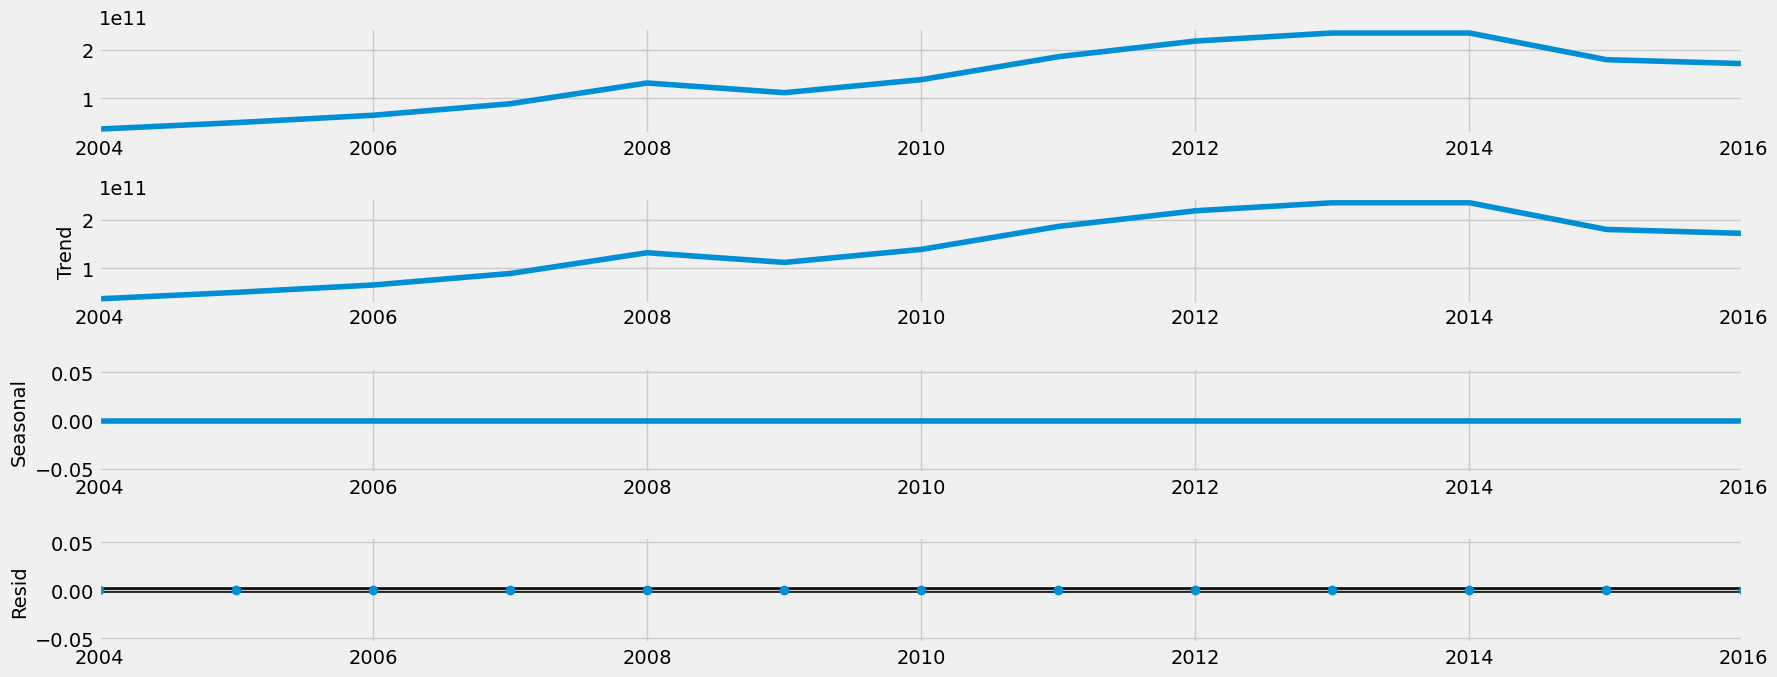

In [264]:
## Plot separate Iraq Components 
decompositionI.plot()
plt.show()

### The Iraq data has an upward trend. There is no seasonality or noise 

### Afghanistan

In [267]:
## Decompose Afghanistan data 
decompositionA = sm.tsa.seasonal_decompose(Afghanistan, model='additive')

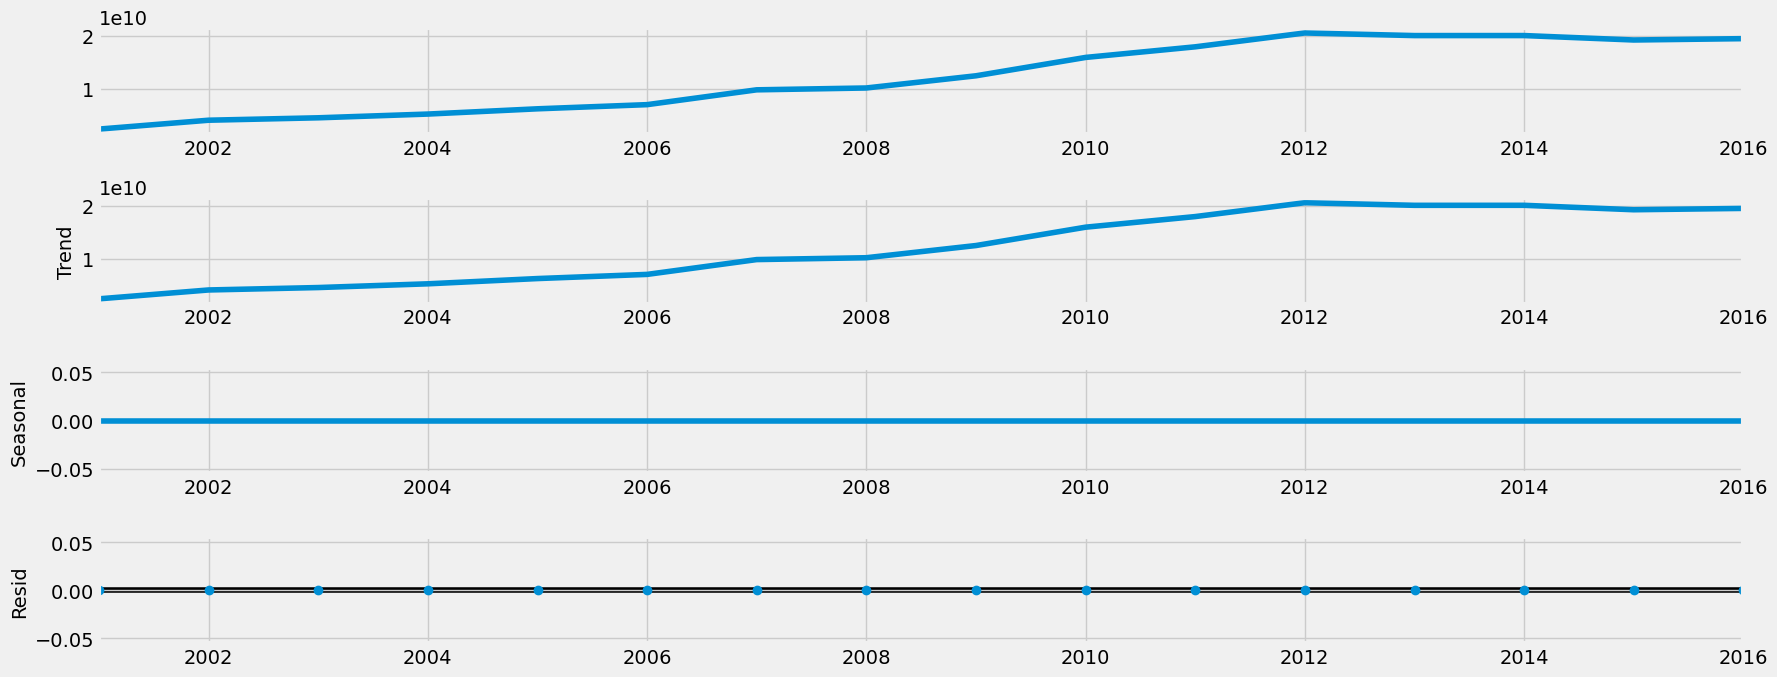

In [268]:
## Plot separate Afghanistan Components 
decompositionA.plot()
plt.show()

### The Afghanistan data has an upward trend. There is no seasonality or noise 

### Pakistan

In [269]:
## Decompose Pakistan data 
decompositionP = sm.tsa.seasonal_decompose(Pakistan, model='additive')

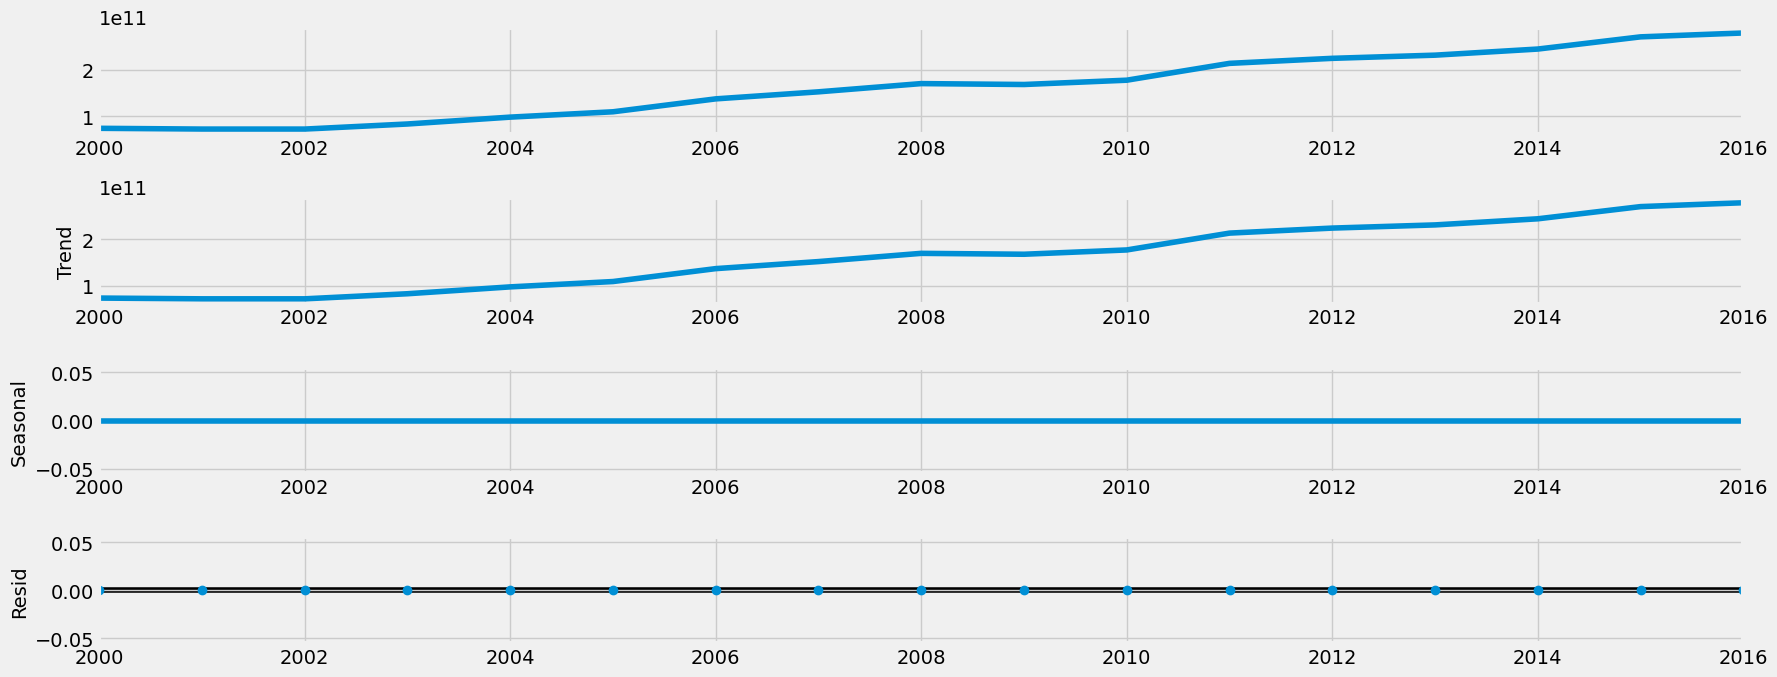

In [270]:
## Plot separate Pakistan Components 
decompositionP.plot()
plt.show()

### The Pakistan data has an upward trend. There is no seasonality or noise 

## 8. Question 6 - Conduct a Dickey-Fuller test to check for stationarity.
Interpret the results in a markdown cell and reference your null hypothesis.

### Iraq

In [272]:
## Conducting Dickey-Fuller test 
def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(Iraq['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.590412
p-value                         0.488408
Number of Lags Used             0.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


### Iraq's test statistic is larger than the critical value at 5%. Thus, I am unable to reject the null hypothesis which is that there is a unit root. My data is not stationary. 

### Afghanistan

In [273]:
## Conducting Dickey-Fuller test 
def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(Afghanistan['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 2.386170
p-value                        0.999004
Number of Lags Used            6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


### Afghanistan's test statistic is larger than the critical value at 5%. Thus, I am unable to reject the null hypothesis which is that there is a unit root. My data is not stationary. 

### Pakistan

In [274]:
## Conducting Dickey-Fuller test 
def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(Pakistan['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.182014
p-value                         0.971235
Number of Lags Used             6.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


### Pakistan's test statistic is larger than the critical value at 5%. Thus, I am unable to reject the null hypothesis which is that there is a unit root. My data is not stationary. 

## 9. Question 7 - If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

### Iraq

In [275]:
## Creating t - (t-1)
Iraq_diff = Iraq - Iraq.shift(1)

In [276]:
## Removing missing values as a result of differencing 
Iraq_diff.dropna(inplace = True)

In [277]:
## Consistency checks 
Iraq_diff.head

<bound method NDFrame.head of                    Value
datetime                
2005-01-01  1.332699e+10
2006-01-01  1.518540e+10
2007-01-01  2.369976e+10
2008-01-01  4.277361e+10
2009-01-01 -1.995281e+10
2010-01-01  2.685587e+10
2011-01-01  4.723294e+10
2012-01-01  3.225132e+10
2013-01-01  1.664738e+10
2014-01-01  0.000000e+00
2015-01-01 -5.500816e+10
2016-01-01 -8.151209e+09>

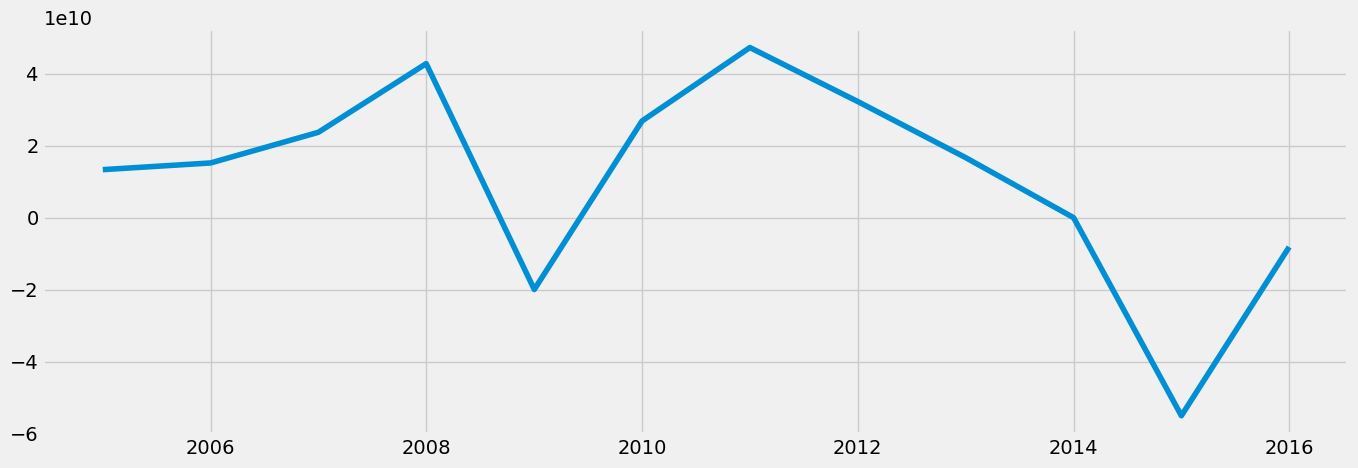

In [279]:
## Plotting Graph 
plt.figure(figsize=(15,5), dpi = 100)
plt.plot(Iraq_diff)

In [278]:
## Checking for stationarity 
dickey_fuller(Iraq_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -3.722079
p-value                        0.003813
Number of Lags Used            4.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


### Now Iraq's test statistic is not larger than the critical value at 5%. Thus, I am able to reject the null hypothesis which is that there is a unit root. My data is now stationary. 

### Afghanistan

In [280]:
## Creating t - (t-1)
Afghanistan_diff = Afghanistan - Afghanistan.shift(1)

In [281]:
## Removing missing values as a result of differencing 
Afghanistan_diff.dropna(inplace = True)

In [296]:
## Consistency checks 
Afghanistan_diff.head

<bound method NDFrame.head of                    Value
datetime                
2002-01-01  1.667155e+09
2003-01-01  4.548235e+08
2004-01-01  7.018214e+08
2005-01-01  9.896079e+08
2006-01-01  7.825248e+08
2007-01-01  2.786244e+09
2008-01-01  3.466874e+08
2009-01-01  2.296414e+09
2010-01-01  3.449857e+09
2011-01-01  1.993439e+09
2012-01-01  2.606303e+09
2013-01-01 -4.902084e+08
2014-01-01  3.855578e+06
2015-01-01 -8.346277e+08
2016-01-01  2.534600e+08>

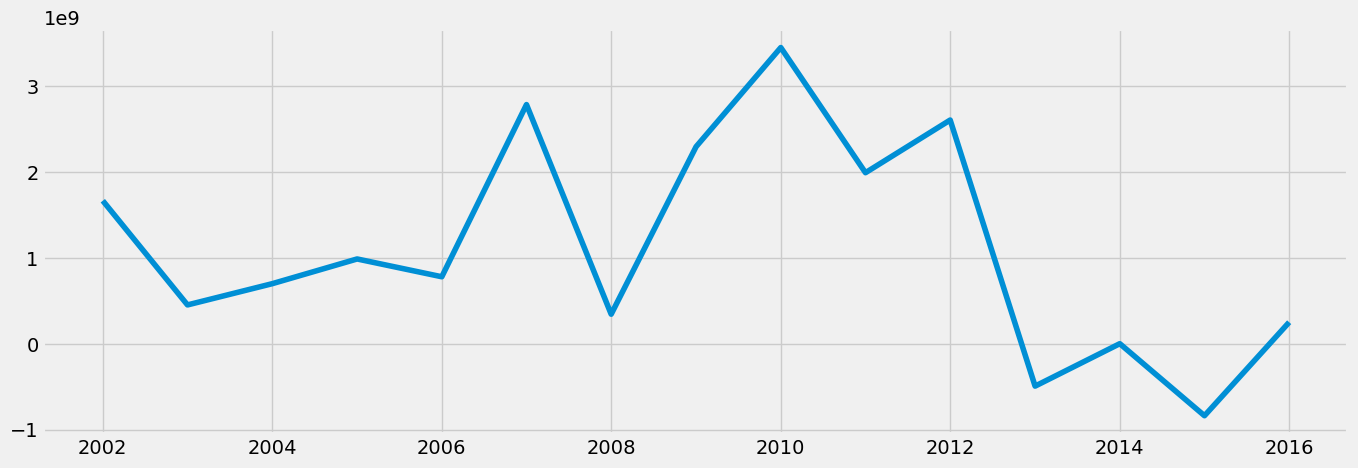

In [283]:
## Plotting Graph 
plt.figure(figsize=(15,5), dpi = 100)
plt.plot(Afghanistan_diff)

In [284]:
## Checking for stationarity 
dickey_fuller(Afghanistan_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.496574
p-value                         0.116310
Number of Lags Used             0.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


### Afghanistan's test statistic is larger than the critical value at 5%. Thus, I am unable to reject the null hypothesis which is that there is a unit root. My data is not stationary. 

### Pakistan

In [286]:
## Creating t - (t-1)
Pakistan_diff = Pakistan - Pakistan.shift(1)

In [287]:
## Removing missing values as a result of differencing 
Pakistan_diff.dropna(inplace = True)

In [297]:
## Consistency checks 
Pakistan_diff.head

<bound method NDFrame.head of                    Value
datetime                
2001-01-01 -1.642636e+09
2002-01-01 -2.918525e+06
2003-01-01  1.093798e+10
2004-01-01  1.473297e+10
2005-01-01  1.152434e+10
2006-01-01  2.776196e+10
2007-01-01  1.512166e+10
2008-01-01  1.769210e+10
2009-01-01 -1.925039e+09
2010-01-01  9.254079e+09
2011-01-01  3.618056e+10
2012-01-01  1.079621e+10
2013-01-01  6.834946e+09
2014-01-01  1.314232e+10
2015-01-01  2.619524e+10
2016-01-01  8.357244e+09>

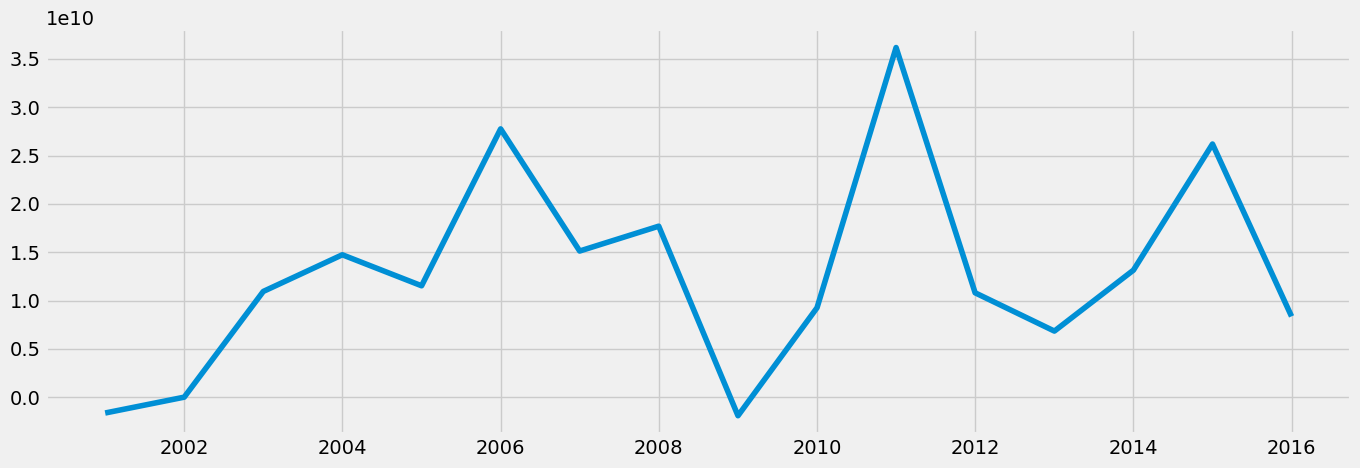

In [289]:
## Plotting Graph 
plt.figure(figsize=(15,5), dpi = 100)
plt.plot(Pakistan_diff)

In [290]:
## Checking for stationarity 
dickey_fuller(Pakistan_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -9.408842e+00
p-value                        5.910074e-16
Number of Lags Used            6.000000e+00
Number of Observations Used    9.000000e+00
Critical Value (1%)           -4.473135e+00
Critical Value (5%)           -3.289881e+00
Critical Value (10%)          -2.772382e+00
dtype: float64


### Now Pakistan's test statistic is not larger than the critical value at 5%. Thus, I am able to reject the null hypothesis which is that there is a unit root. My data is now stationary. 

## 9. Question 8 - If your data still isn’t stationary, perform another round of differencing and repeat step 6.

### Afghanistan

In [300]:
## Creating t - (t-1)
Afghanistan_diff2 = Afghanistan_diff - Afghanistan_diff.shift(1)

In [301]:
## Removing missing values as a result of differencing 
Afghanistan_diff2.dropna(inplace = True)

In [305]:
## Consistency checks 
Afghanistan_diff2.head

<bound method NDFrame.head of                    Value
datetime                
2003-01-01 -1.212331e+09
2004-01-01  2.469979e+08
2005-01-01  2.877864e+08
2006-01-01 -2.070831e+08
2007-01-01  2.003719e+09
2008-01-01 -2.439557e+09
2009-01-01  1.949726e+09
2010-01-01  1.153444e+09
2011-01-01 -1.456418e+09
2012-01-01  6.128646e+08
2013-01-01 -3.096512e+09
2014-01-01  4.940640e+08
2015-01-01 -8.384833e+08
2016-01-01  1.088088e+09>

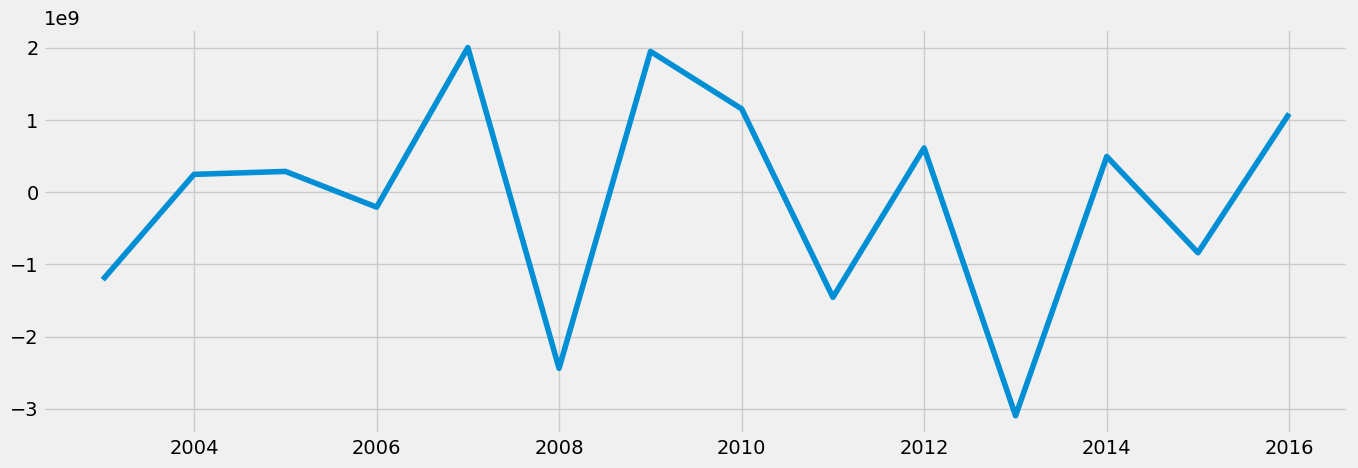

In [303]:
## Plotting Graph 
plt.figure(figsize=(15,5), dpi = 100)
plt.plot(Afghanistan_diff2)

In [304]:
## Checking for stationarity 
dickey_fuller(Afghanistan_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -4.658909
p-value                        0.000100
Number of Lags Used            5.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


### Now Afghanistan's test statistic is not larger than the critical value at 5%. Thus, I am able to reject the null hypothesis which is that there is a unit root. My data is now stationary. 

## 10. Question 9 - Check your data’s autocorrelations.

### Iraq

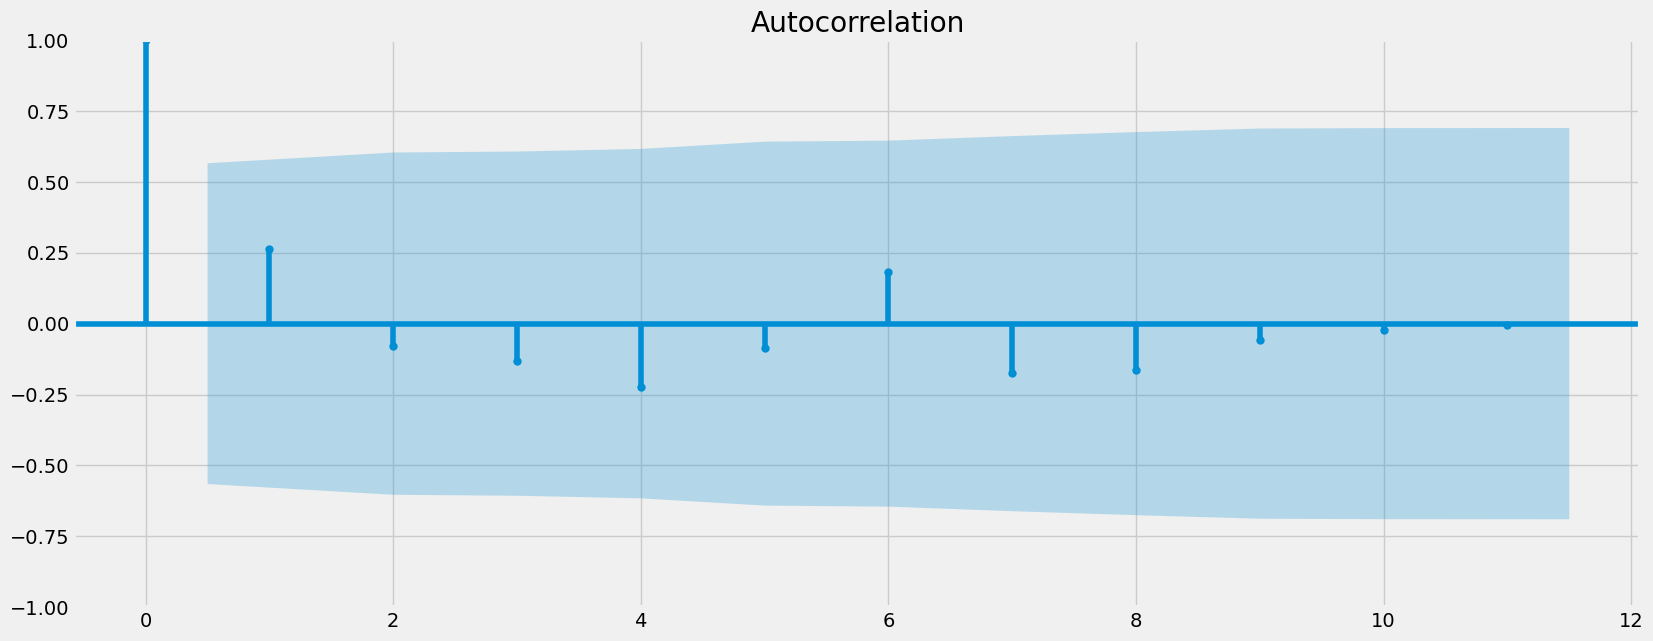

In [308]:
plot_acf(Iraq_diff)
plt.show()

### Iraq's data only has one lag significantly correlated with each other. Thus, my data is stationary. 

### Afghanistan

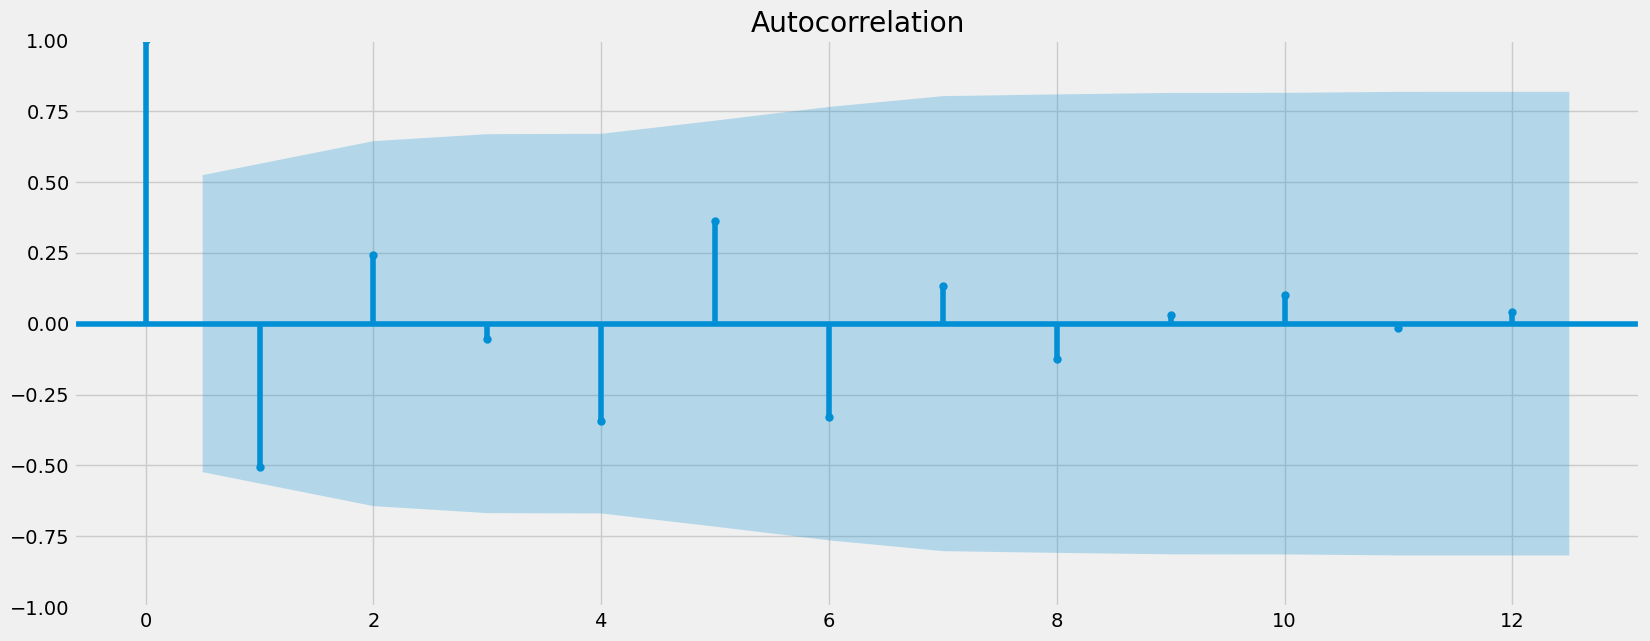

In [309]:
plot_acf(Afghanistan_diff2)
plt.show()

### Afghanistan's data only has one lag significantly correlated with each other. Thus, my data is stationary. 

### Pakistan

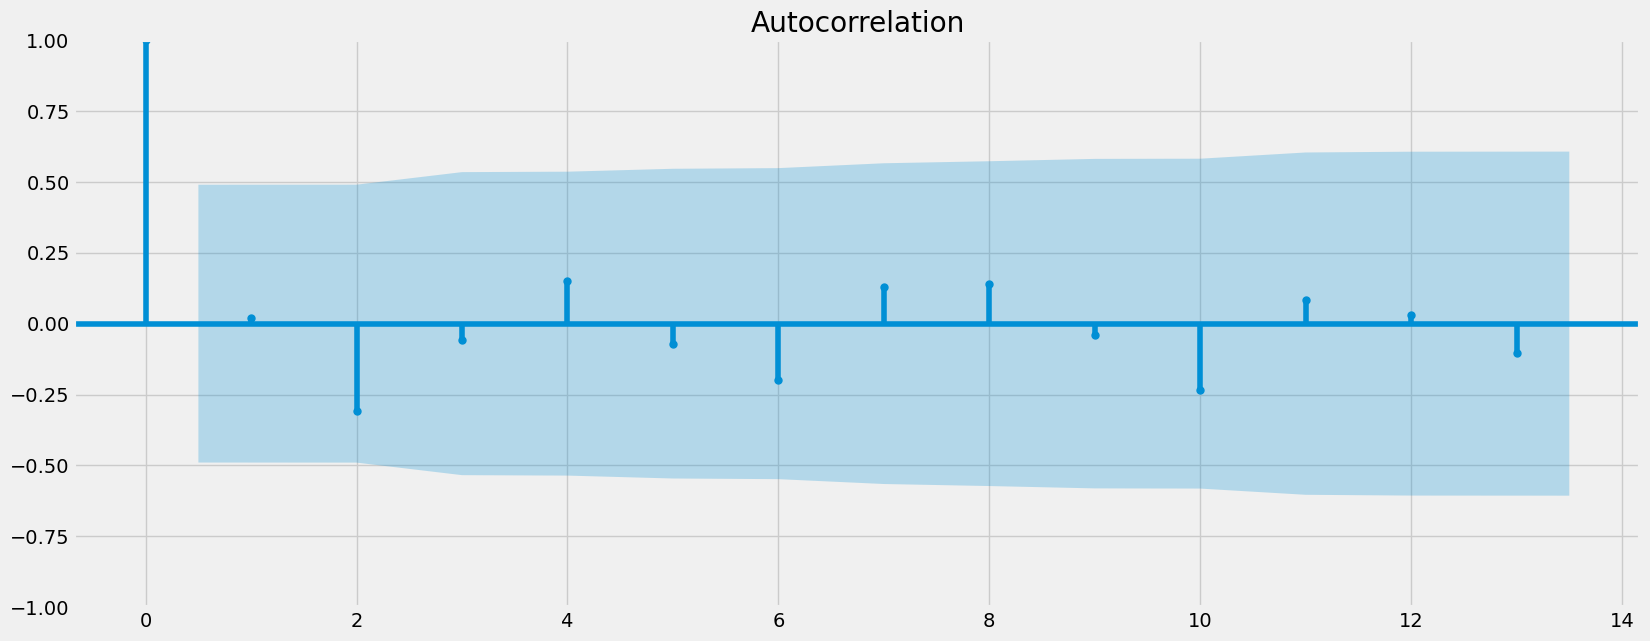

In [310]:
plot_acf(Pakistan_diff)
plt.show()

### Pakistan's data only has one lag significantly correlated with each other. Thus, my data is stationary. 